# Home Credit Default Risk: EDA and Machine Learning Model

### Requirement:

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders. Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging the data science community to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

This is a personal project of Tung Pham in order to serve as the midterm project for the Machine Learning course taken at the University of Economics and Law (VNU-HCM), a simple notebook on exploration and baseline machine learning model of home credit default risk data to prediction future payment problem for clients of the company.


## 1. Dataset Preparation

In [1]:
pip install chart-studio

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install wordcloud

In [3]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [4]:
from plotly.offline import init_notebook_mode, iplot
from wordcloud import WordCloud
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import chart_studio.plotly as py
from plotly import tools
from datetime import date
import pandas as pd
import numpy as np 
import seaborn as sns
import random 
import warnings
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

path = "C:/Users/Admin/Downloads/home-credit-default-risk/"

def bar_hor(df, col, title, color, w=None, h=None, lm=0, limit=100, return_trace=False, rev=False, xlb = False):
    cnt_srs = df[col].value_counts()
    yy = cnt_srs.head(limit).index[::-1] 
    xx = cnt_srs.head(limit).values[::-1] 
    if rev:
        yy = cnt_srs.tail(limit).index[::-1] 
        xx = cnt_srs.tail(limit).values[::-1] 
    if xlb:
        trace = go.Bar(y=xlb, x=xx, orientation = 'h', marker=dict(color=color))
    else:
        trace = go.Bar(y=yy, x=xx, orientation = 'h', marker=dict(color=color))
    if return_trace:
        return trace 
    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

def bar_hor_noagg(x, y, title, color, w=None, h=None, lm=0, limit=100, rt=False):
    trace = go.Bar(y=x, x=y, orientation = 'h', marker=dict(color=color))
    if rt:
        return trace
    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)


def bar_ver_noagg(x, y, title, color, w=None, h=None, lm=0, rt = False):
    trace = go.Bar(y=y, x=x, marker=dict(color=color))
    if rt:
        return trace
    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)
    
def gp(col, title):
    df1 = app_train[app_train["TARGET"] == 1]
    df0 = app_train[app_train["TARGET"] == 0]
    a1 = df1[col].value_counts()
    b1 = df0[col].value_counts()
    
    total = dict(app_train[col].value_counts())
    x0 = a1.index
    x1 = b1.index
    
    y0 = [float(x)*100 / total[x0[i]] for i,x in enumerate(a1.values)]
    y1 = [float(x)*100 / total[x1[i]] for i,x in enumerate(b1.values)]

    trace1 = go.Bar(x=a1.index, y=y0, name='Target : 1', marker=dict(color="#96D38C"))
    trace2 = go.Bar(x=b1.index, y=y1, name='Target : 0', marker=dict(color="#FEBFB3"))
    return trace1, trace2 

## 2. Exploration of Applications Data </a>

### 2.1 Snapshot of Application Train</a>

Application data consists of static data for all applications and every row represents one loan.

In [5]:
app_train = pd.read_csv(path + "application_train.csv")
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


> There are total 307,511 rows which contains the information of loans and there are 122 variables. 

> The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.

### 2.2 Distribution of Target Variable 

The target variable defines weather the loan was repayed or not. Let us look at what is the distribution of loan repayment in the training dataset. 

In [6]:
# Target Variable Distribution 
bar_hor(app_train, "TARGET", "Distribution of Target Variable" , ["#44ff54", '#ff4444'], h=350, w=600, lm=200, xlb = ['Target : 1','Target : 0'])

> The target variable in this dataset is slightly unbalanced with the majority of loans having the target equal to 0, indicating that individuals have no problem paying their repayments on time. There are around 91% of loans or around 282 thousand loan applications with a target = 0, while only 9% of the total loans (around 24 thousand applications) in this dataset involve applications that have problems paying off loans or making installments.

### 2.3 Gender Type of Applicants 

In [7]:
tr0 = bar_hor(app_train, "CODE_GENDER", "Distribution of CODE_GENDER Variable" ,"#f975ae", w=700, lm=100, return_trace= True)
tr1, tr2 = gp('CODE_GENDER', 'Distribution of Target with Applicant Gender')

fig = tools.make_subplots(rows=1, cols=3, print_grid=False, subplot_titles = ["Gender Distribution" , "Gender, Target=1" ,"Gender, Target=0"])
fig.append_trace(tr0, 1, 1);
fig.append_trace(tr1, 1, 2);
fig.append_trace(tr2, 1, 3);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=50));
iplot(fig);

> In loan application data, women have applied for the majority of loans, which are almost twice as many as men. In total, there were around 202,448 loan applications submitted by women compared to around 105,059 applications submitted by men. However, a larger percentage (about 10% of the total) of men had problems paying off loans or making repayments on time compared to women's applications (about 7%).

### 2.4 Family Status of Applicants </a>

In [8]:
tr0 = bar_hor(app_train, "NAME_FAMILY_STATUS", "Distribution of CODE_GENDER Variable" ,"#f975ae", w=700, lm=100, return_trace= True)
tr1, tr2 = gp('NAME_FAMILY_STATUS', 'Distribution of Target with Applicant Gender')

fig = tools.make_subplots(rows=1, cols=3, print_grid=False, subplot_titles = ["Family Status Distribution" , "Family Status, Target = 1" ,"Family Status, Target = 0"])
fig.append_trace(tr0, 1, 1);
fig.append_trace(tr1, 1, 2);
fig.append_trace(tr2, 1, 3);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=120));
iplot(fig);

> Married people have submitted a large number of loan applications of around 196 thousand. However, people who have civil marriages have the highest percentage (about 10%) of problems and challenges in repaying loans.

### 2.5. Does applicants own Real Estate or Car?

In [9]:
## real estate 
t = app_train['FLAG_OWN_REALTY'].value_counts()
labels = t.index
values = t.values
colors = ['#96D38C','#FEBFB3']
trace = go.Pie(labels=labels, values=values,
               hoverinfo='label+percent', textinfo='label+percent',
               textfont=dict(size=12),
               marker=dict(colors=colors,
                           line=dict(color='#fff', width=2)))
layout = go.Layout(title='Applicants Owning Real Estate', height=400)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)


t = app_train['FLAG_OWN_CAR'].value_counts()
labels = t.index
values = t.values
colors = ['#FEBFB3','#96D38C']
trace = go.Pie(labels=labels, values=values,
               hoverinfo='label+percent', textinfo='label+percent',
               textfont=dict(size=12),
               marker=dict(colors=colors,
                           line=dict(color='#fff', width=2)))
layout = go.Layout(title='Applicants Owning Car', height=400)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)


tr1, tr2 = gp('FLAG_OWN_REALTY', 'Applicants Owning Real Estate wrt Target Variable')
tr3, tr4 = gp('FLAG_OWN_CAR', 'Applicants Owning Car wrt Target Variable')
fig = tools.make_subplots(rows=1, cols=2, print_grid=False, 
                          subplot_titles = ["% Applicants with RealEstate and Target = 1", "% Applicants with Car and Target = 1"])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr3, 1, 2);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=120));
iplot(fig);

> About 70% of applicants own real estate property, whereas only 34% of applicants who own a car have applied for a loan in recent years. However, a higher percentage of people experiencing payment difficulties was observed in applicants who did not own a car or real estate property.

### 2.6 Suite Type and Income Type of Applicants 

In [10]:
tr0 = bar_hor(app_train, "NAME_TYPE_SUITE", "Distribution of CODE_GENDER Variable" ,"#f975ae", w=700, lm=100, return_trace= True)
tr1 = bar_hor(app_train, "NAME_INCOME_TYPE", "Distribution of CODE_GENDER Variable" ,"#f975ae", w=700, lm=100, return_trace= True)

fig = tools.make_subplots(rows=1, cols=2, print_grid=False, subplot_titles = ['Applicants Suite Type' , 'Applicants Income Type'])
fig.append_trace(tr0, 1, 1);
fig.append_trace(tr1, 1, 2);
fig['layout'].update(height=400, showlegend=False, margin=dict(l=100));
iplot(fig);

> The top three types of suites applying for loans are:
- Unaccompanied (about 248 thousand applicants)
- Family (about 40 thousand applicants)
- Spouses, partner (about 11 thousand applicants)

> The types of income that loan applicants have cover about 8 categories, the top ones are:
- Working (158 thousand applicants)
- Commercial associate (71 thousand applicants)
- Pensioner (55 thousand applicants)

### 2.6.1 How does Target Varies with Suite and Income Type of Applicants

In [11]:
tr1, tr2 = gp('NAME_TYPE_SUITE', 'Applicants Type Suites which repayed the loan')
fig = tools.make_subplots(rows=1, cols=2, print_grid=False, 
                          subplot_titles = ["Applicants Type Suites distribution when Target = 1", "Applicants Type Suites distribution when Target = 0"])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr2, 1, 2);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=120));
iplot(fig);


tr1, tr2 = gp('NAME_INCOME_TYPE', 'Applicants Income Types which repayed the loan')
fig = tools.make_subplots(rows=1, cols=2, print_grid=False, 
                          subplot_titles = ["Applicants Income Types when Target = 1", "Applicants Income Type When Target = 0"])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr2, 1, 2);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=120));
iplot(fig);

> From the results of the analysis, it appears that applicants with the type of income Maternity Leave and Unemployment have the highest percentage (about 40% and 36%) for Target = 1, which means they have more payment problems. Meanwhile, Pensioners and State servant have the lowest percentage (around 5.3% and 5.7% respectively).

### 2.7. Applicant's Contract Type

In [12]:
t = app_train['NAME_CONTRACT_TYPE'].value_counts()
labels = t.index
values = t.values
colors = ['#FEBFB3','#96D38C']
trace = go.Pie(labels=labels, values=values,
               hoverinfo='label+percent', textinfo='label+percent',
               textfont=dict(size=12),
               marker=dict(colors=colors,
                           line=dict(color='#fff', width=2)))
layout = go.Layout(title='Applicants Contract Type', height=400)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

> The number of cash loans reached around 278 thousand (about 90.5%), which is the majority of all loan data in this dataset. Meanwhile, the number of loans with the type of Revolving loans is much less, only around 29 thousand (9.52%) compared to Cash loans.

> Notes:
- Cash loans are a type of loan in which the borrower receives a certain amount of money and pays it back in fixed installments over a predetermined period of time.
- Revolving loans are a type of loan in which the borrower is given a maximum credit limit and can take part or all of the amount of money required up to the credit limit, with interest payments on the amount borrowed and paying the minimum amount every month.

### 2.8 Education Type and Housing Type

In [13]:
tr1 = bar_hor(app_train, "NAME_EDUCATION_TYPE", "Distribution of " ,"#f975ae", w=700, lm=100, return_trace= True)
tr2 = bar_hor(app_train, "NAME_HOUSING_TYPE", "Distribution of " ,"#f975ae", w=700, lm=100, return_trace = True)

fig = tools.make_subplots(rows=1, cols=2, print_grid=False, subplot_titles = ['Applicants Education Type', 'Applicants Housing Type' ])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr2, 1, 2);
fig['layout'].update(height=400, showlegend=False, margin=dict(l=100));
iplot(fig);


tr1, tr2 = gp('NAME_EDUCATION_TYPE', 'Applicants Income Types which repayed the loan')
tr3, tr4 = gp('NAME_HOUSING_TYPE', 'Applicants Income Types which repayed the loan')
fig = tools.make_subplots(rows=1, cols=2, print_grid=False, 
                          subplot_titles = ["Applicants Education Types, Target=1", "Applicants Housing Type, Target=1"])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr3, 1, 2);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=30));
iplot(fig);

> The highest number of loan applications (around 218 thousand) were submitted by people with Secondary education, followed by people with Higher education with around 75 thousand applications. People who live in houses or apartments have the highest number of loan applications, around 272 thousand. However, we noticed that applicants with Lower secondary education status had a higher percentage of payment problems. In addition, applicants who live in rented apartments or live with their parents also show the same trend.

### 2.9. Which Organization and Occupation Type applies for loan and which repays 

In [14]:
tr1 = bar_hor(app_train, "ORGANIZATION_TYPE", "Distribution of " ,"#f975ae", w=700, lm=100, return_trace= True)
tr2 = bar_hor(app_train, "OCCUPATION_TYPE", "Distribution of " ,"#f975ae", w=700, lm=100, return_trace = True)
fig = tools.make_subplots(rows=1, cols=2, print_grid=False, subplot_titles = ['Applicants Organization Type', 'Applicants Occupation Type' ])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr2, 1, 2);
fig['layout'].update(height=600, showlegend=False, margin=dict(l=150));
iplot(fig);

> The largest number of loan applicants were Laborers (around 55 thousand), followed by Sales Staff (around 32 thousand) and Core Staff (around 28 thousand). Organizations with Business Entity Type 3 have applied for the maximum loan amount, which is around 67 thousand.

### 2.9.1 Target Variable with respect to Organization and Occupation Type

In [15]:
tr1, tr2 = gp('ORGANIZATION_TYPE', 'Applicants Income Types which repayed the loan')
tr3, tr4 = gp('OCCUPATION_TYPE', 'Applicants Income Types which repayed the loan')
fig = tools.make_subplots(rows=1, cols=2, print_grid=False, 
                          subplot_titles = ["Applicants Organization Types - Repayed", "Applicants Occupation Type - Repayed"])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr3, 1, 2);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=120));
iplot(fig);

> The group with the largest payment problem and significantly more than the other groups in the Occupation Type are Low-skill Laborers. Meanwhile, for Organization Types, the group with the biggest payment problems was in Transport: type 3, and the group with the least problems was in Trade: Type 4.

### 2.10. Walls Material, Foundation, and House Type

In [16]:
tr1 = bar_hor(app_train, "FONDKAPREMONT_MODE", "Distribution of FLAG_OWN_REALTY" ,"#639af2", w=700, lm=100, return_trace= True)
tr2 = bar_hor(app_train, "WALLSMATERIAL_MODE", "Distribution of FLAG_OWN_CAR" ,"#a4c5f9", w=700, lm=100, return_trace = True)
tr1 = bar_hor(app_train, "HOUSETYPE_MODE", "Distribution of FLAG_OWN_CAR" ,"#a4c5f9", w=700, lm=100, return_trace = True)

fig = tools.make_subplots(rows=1, cols=2, print_grid=False, subplot_titles = [ 'House Type', 'Walls Material'])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr2, 1, 2);
# fig.append_trace(tr3, 1, 3);

fig['layout'].update(height=400, showlegend=False, margin=dict(l=100));
iplot(fig);

> "Blocks and Flats" related house types have submitted the highest number of loan applications, around 150 thousand, while other categories such as Specific Housing and Terraced houses have a number of applications of less than 1500. Similarly, houses with Panel and Stone Brick walls have the largest number of applications reaches about 120 thousand simultaneously.


### 2.10.1 Target Variable with respect to Walls Material, Fondkappremont, House Type

In [17]:
tr1, tr2 = gp('HOUSETYPE_MODE', 'Applicants Income Types which repayed the loan')
tr3, tr4 = gp('WALLSMATERIAL_MODE', 'Applicants Income Types which repayed the loan')
fig = tools.make_subplots(rows=1, cols=2, print_grid=False, subplot_titles = ["HouseTypes - Repayed", "WallsMaterial - Repayed"])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr3, 1, 2);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=120));
iplot(fig);

> Contrary to the above observation, people in the Specific housing type have the largest payment problem, while the overwhelming number of Block of Flats have no payment problem (only 7%). With WallsMaterial, the overwhelming number of Panels and Stone Brick above doesn't have much of an impact when the group's payment problem is similar to that of other groups.

### 2.11. Distribution of Amount Credit 

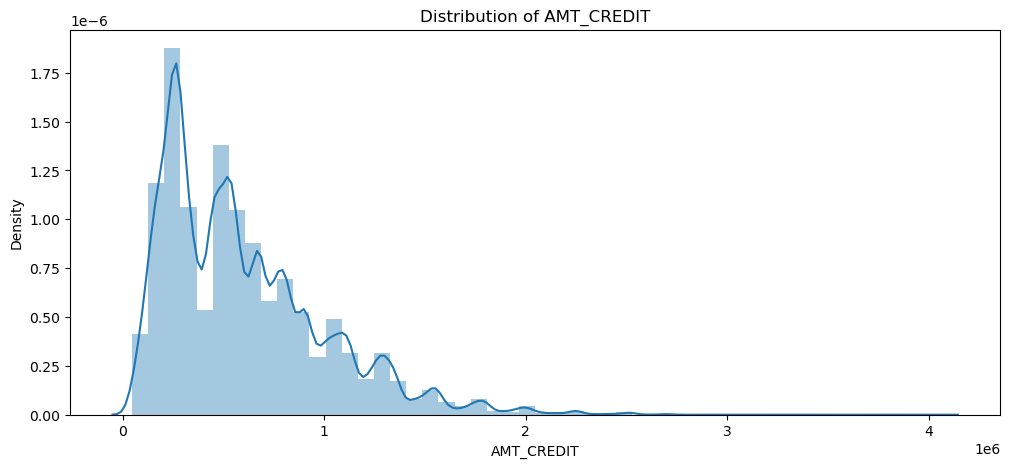

In [18]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT")
ax = sns.distplot(app_train["AMT_CREDIT"])

### 2.12 Distribution of Amount AMT_ANNUITY

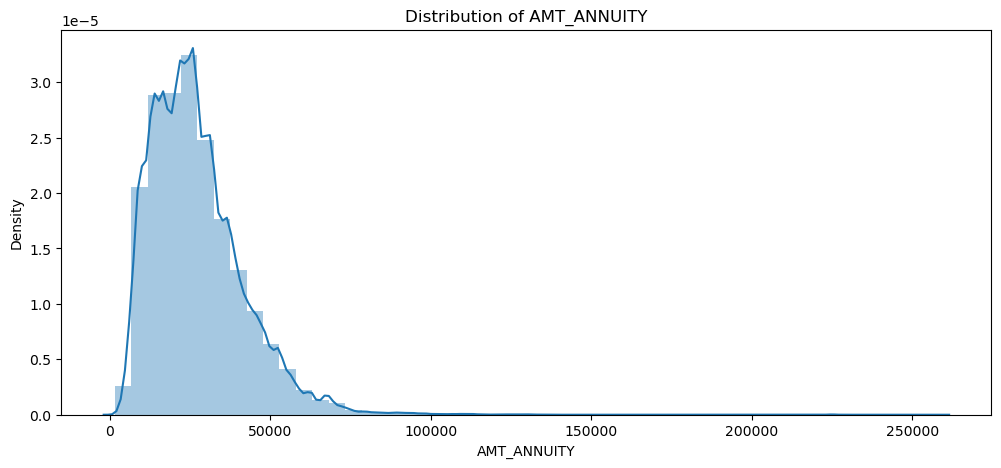

In [19]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_ANNUITY")
ax = sns.distplot(app_train["AMT_ANNUITY"].dropna())

### 2.13 Distribution of Amount AMT_GOODS_PRICE

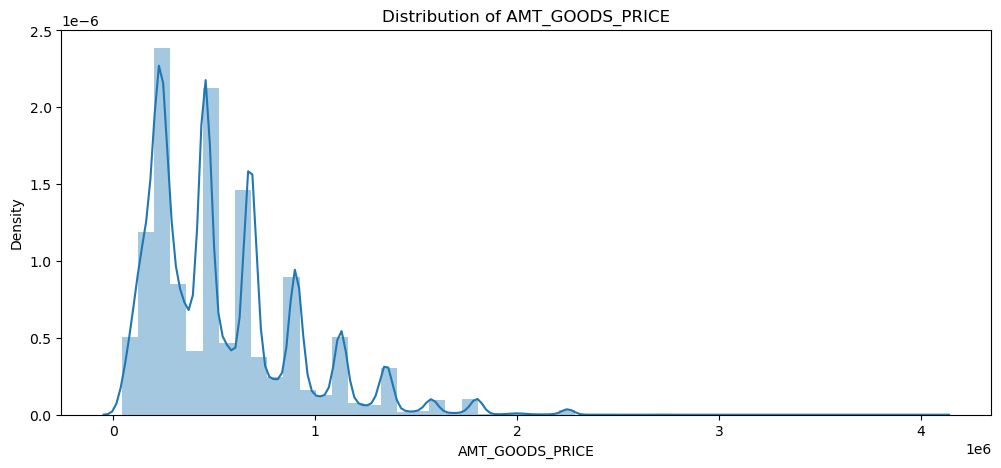

In [20]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_GOODS_PRICE")
ax = sns.distplot(app_train["AMT_GOODS_PRICE"].dropna())

### 2.14 Distribution of Amount REGION_POPULATION_RELATIVE

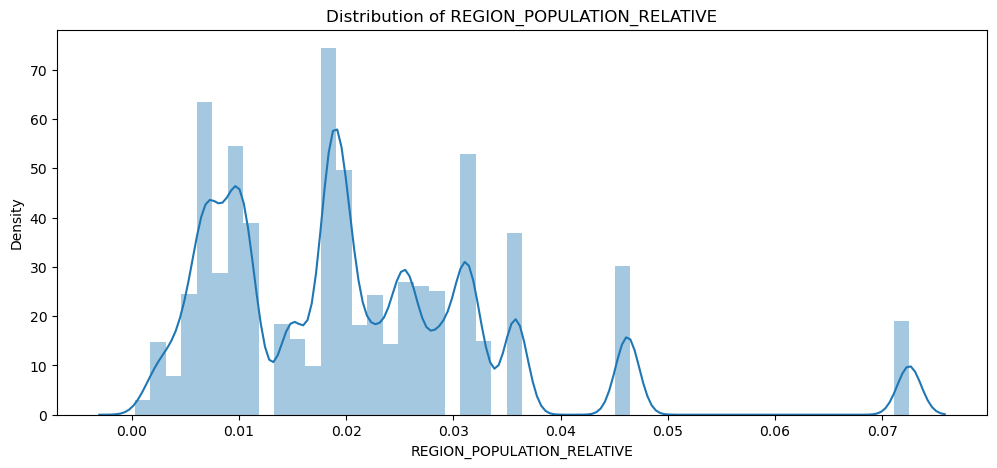

In [21]:
plt.figure(figsize=(12,5))
plt.title("Distribution of REGION_POPULATION_RELATIVE")
ax = sns.distplot(app_train["REGION_POPULATION_RELATIVE"])

### 2.15 Distribution of Amount DAYS_BIRTH

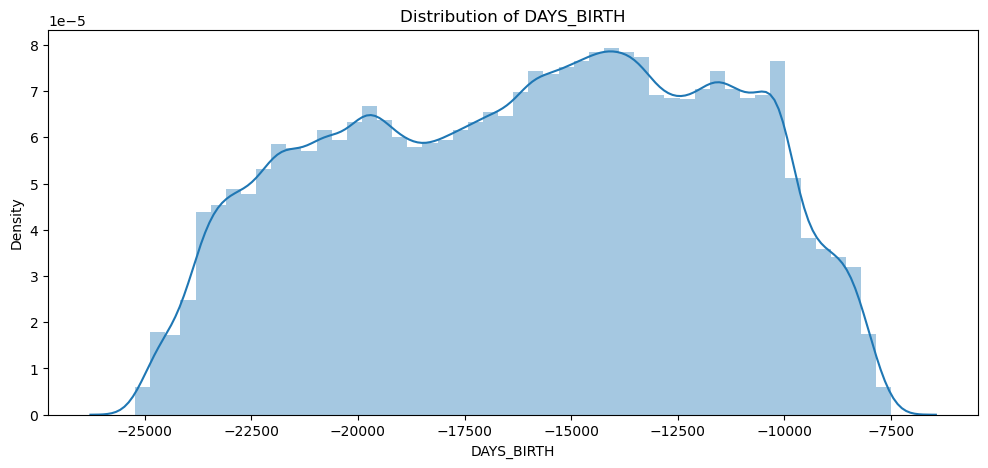

In [22]:
plt.figure(figsize=(12,5))
plt.title("Distribution of DAYS_BIRTH")
ax = sns.distplot(app_train["DAYS_BIRTH"])

### 2.16 Distribution of Amount DAYS_EMPLOYED 

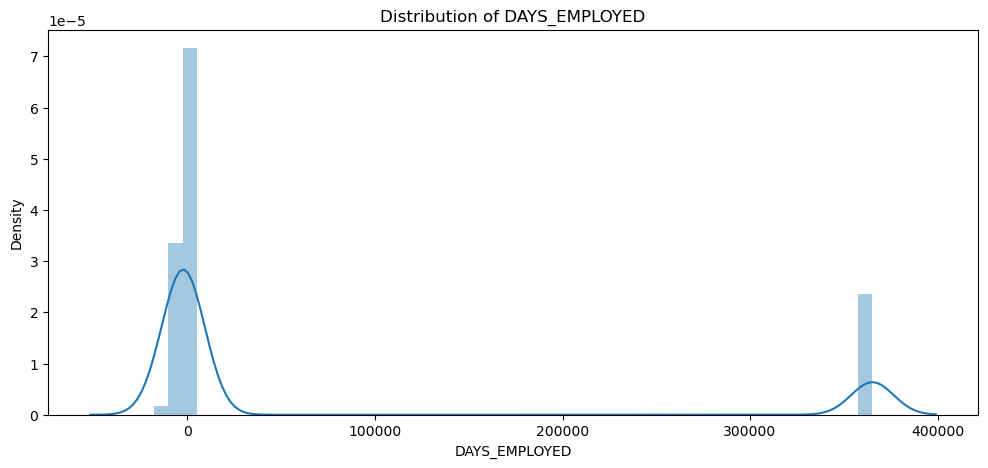

In [23]:
plt.figure(figsize=(12,5))
plt.title("Distribution of DAYS_EMPLOYED")
ax = sns.distplot(app_train["DAYS_EMPLOYED"])

### 2.17 Distribution of Number of Days for Registration

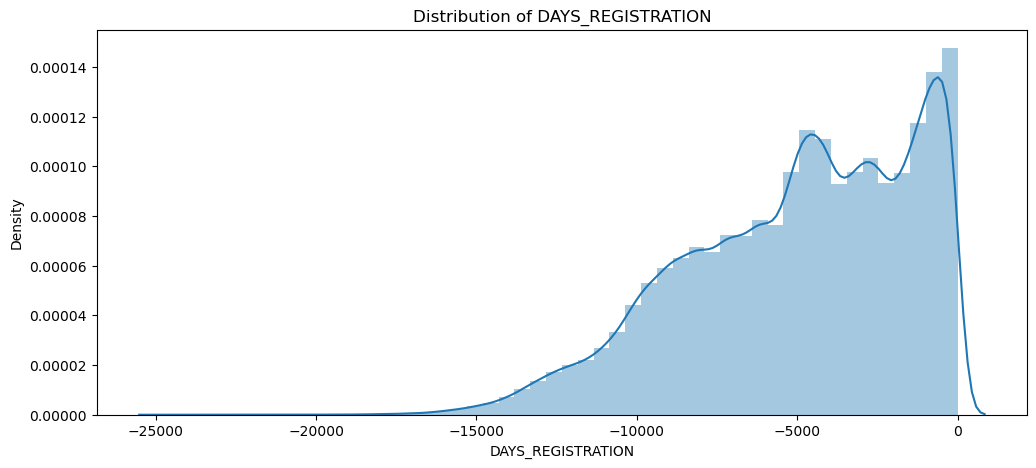

In [24]:
plt.figure(figsize=(12,5))
plt.title("Distribution of DAYS_REGISTRATION")
ax = sns.distplot(app_train["DAYS_REGISTRATION"])

### 2.18 How many Family Members does the applicants has

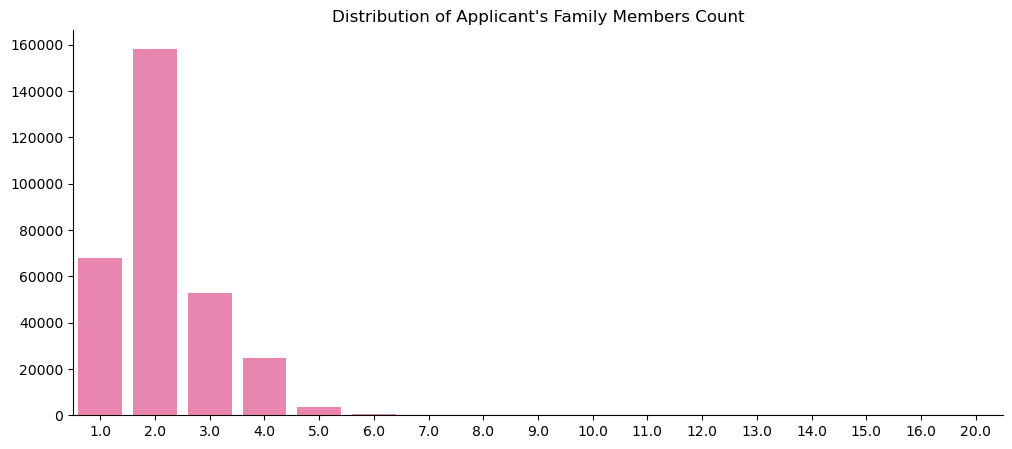

In [25]:
t = app_train["CNT_FAM_MEMBERS"].value_counts()
t1 = pd.DataFrame()
t1['x'] = t.index 
t1['y'] = t.values 

plt.figure(figsize=(12,5));
plt.title("Distribution of Applicant's Family Members Count");
ax = sns.barplot(data=t1, x="x", y="y", color="#f975ae");
ax.spines['right'].set_visible(False);
ax.spines['top'].set_visible(False);

ax.set_ylabel('');    
ax.set_xlabel('');

> Most of the applicants who apply for the loan have 2 family members in total.

### 2.19 How many Children does the applicants have

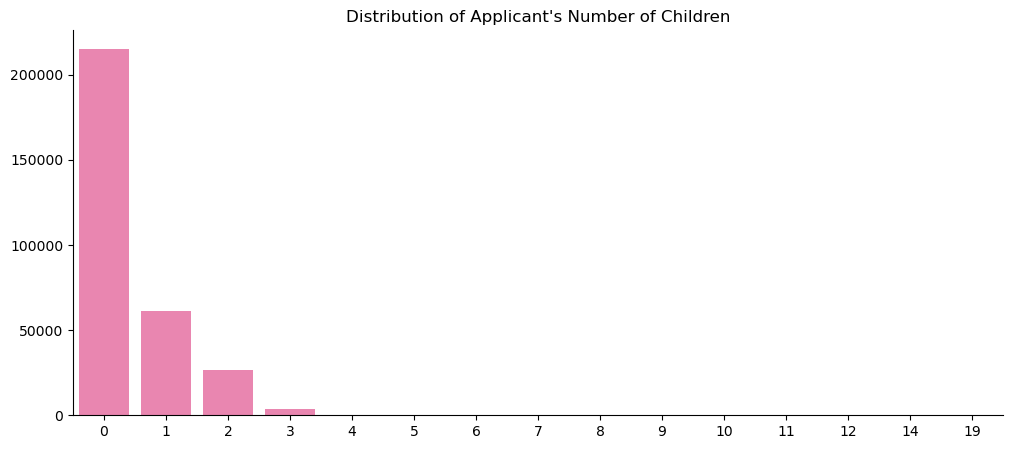

In [26]:
t = app_train["CNT_CHILDREN"].value_counts()
t1 = pd.DataFrame()
t1['x'] = t.index 
t1['y'] = t.values 

plt.figure(figsize=(12,5));
plt.title("Distribution of Applicant's Number of Children");
ax = sns.barplot(data=t1, x="x", y="y", color="#f975ae");
ax.spines['right'].set_visible(False);
ax.spines['top'].set_visible(False);

ax.set_ylabel('');    
ax.set_xlabel('');

> Most applicants do not have children when applying for a loan.

## 3. Exploration of Bureau Data

Previous credit data from other financial institutions reported to the Credit Bureau (for clients who had loans in our sample). For each loan in our sample, there are as many lines as the number of credits the client had with the Credit Bureau before the application date.

### 3.1 Snapshot of Bureau Data

"Bureau data" refers to previous credit data reported by the client to the credit agency or Credit Bureau. This data provides information about a client's previous credit history, including previous loan amounts, loan payments, and other credit history that can assist in determining the credit risk for a loan application submitted.

In [27]:
bureau = pd.read_csv(path + "bureau.csv")
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


## 4. Exploration of Bureau Balance Data

Monthly balances of previous credits in Credit Bureau. This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

### 4.1 Snapshot of Bureau Balance Data

Bureau balance data refers to data that presents information about credit balances and credit payments at other financial institutions that are reported to the Credit Bureau, when a credit application is made by a client. This data includes the number of credits reported, the number of payments made, and delays in credit payments that occurred before the credit application was made. In this case, the Credit Bureau may provide information about a person's credit history to assist banks or financial institutions in determining credit risk.

In [28]:
bureau_balance = pd.read_csv(path + "bureau_balance.csv")
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


## 5. Exploration of Credit Card Balance

Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

### 5.1 Snapshot of Credit Card Balance

Credit card balance is the remaining debt that must be paid by credit card holders to credit card issuers after using the credit card to make purchases or transactions. The amount of this balance can change depending on various factors, such as interest, administration fees, and payments made by credit card holders. High credit card balances can lead to greater interest and administration fees and can make it difficult for credit card holders to pay their debts.

In [29]:
credit_card_balance = pd.read_csv(path + "credit_card_balance.csv")
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


## 6. Exploration of POS CASH Balance Data

Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit. This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

### 6.1 Snapshot of POS CASH Balance Data

POS CASH Balance Data is data that contains information about the remaining balance on a customer's debit card at bank branches or ATM machines and the remaining balance on a customer's credit card at shops or EDC machines. This data describes how often customers make transactions using their debit or credit cards and how much balance is left at the end of each month. This data can provide important information about customers' spending and spending habits and can assist banks in evaluating customers' credit risk.

In [30]:
pcb = pd.read_csv(path + "POS_CASH_balance.csv")
pcb.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


## 7. Exploration of Previous Application

### 7.1 Snapshot of Previous Application

Previous application is data that presents information about credit applications submitted by customers in the past to other financial institutions before submitting credit applications to financial institutions that are being observed in the dataset. This data also includes information about whether the previous application was approved or not, the amount of credit requested, and so on.

In [31]:
previous_application = pd.read_csv(path + "previous_application.csv")
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### 7.2 Contract Status Distribution in Previously Filed Applications

In [32]:
t = previous_application['NAME_CONTRACT_STATUS'].value_counts()
labels = t.index
values = t.values

colors = ['#FEBFB3', '#E1396C', '#96D38C', '#D0F9B1']

trace = go.Pie(labels=labels, values=values,
               hoverinfo='label+percent', textinfo='label+percent',
               textfont=dict(size=12),
               marker=dict(colors=colors,
                           line=dict(color='#fff', width=2)))

layout = go.Layout(title='Name Contract Status in Previous Applications', height=400)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

> As many as 62% of the number of previous applicants received approval, while around 19% were declared canceled and another 17% were resubmitted.

### 7.3 Suite Type Distribution of Previous Applications

In [33]:
t = previous_application['NAME_TYPE_SUITE'].value_counts()
labels = t.index
values = t.values

colors = ['#FEBFB3', '#E1396C', '#96D38C', '#D0F9B1']

trace = go.Pie(labels=labels, values=values,
               hoverinfo='label+percent', textinfo='label+percent',
               textfont=dict(size=12),
               marker=dict(colors=colors,
                           line=dict(color='#fff', width=2)))

layout = go.Layout(title='Suite Type in Previous Application Distribution', height=400)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

> Most of the applicants had previous applications with Unaccompanied Type (approx. 60%) followed by Family Type (approx. 25%).

### 7.4 Client Type of Previous Applications

In [34]:
t = previous_application['NAME_CLIENT_TYPE'].value_counts()
labels = t.index
values = t.values

colors = ['#FEBFB3', '#E1396C', '#96D38C', '#D0F9B1']

trace = go.Pie(labels=labels, values=values,
               hoverinfo='label+percent', textinfo='label+percent',
               textfont=dict(size=12),
               marker=dict(colors=colors,
                           line=dict(color='#fff', width=2)))

layout = go.Layout(title='Client Type in Previous Applications', height=400)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

> 74% of previous applications were made by repeating clients (Repeater), while only 18% were New. About 8% are Refreshed.


### 7.5 Channel Type - Previous Applications

In [35]:
t = previous_application['CHANNEL_TYPE'].value_counts()
labels = t.index
values = t.values

colors = ['#FEBFB3', '#E1396C', '#96D38C', '#D0F9B1']

trace = go.Pie(labels=labels, values=values,
               hoverinfo='label+percent', textinfo='label+percent',
               textfont=dict(size=12),
               marker=dict(colors=colors,
                           line=dict(color='#fff', width=2)))

layout = go.Layout(title='Channel Type in Previous Applications', height=400)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

> "Channel Type in Previous Applications" refers to the type of channel used by the customer to submit previous credit applications. As much as 43% of borrowers borrow at Credit and cash offices, about 30% borrow at Country-wide and 12.7% at Stone

## 8. Exploration of Installation Payments
### 8.1 Snapshot of Installation Payments

In [36]:
installments_payments = pd.read_csv(path + "installments_payments.csv")
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


## 9. Machine Learning Model

### 9.1 Dataset Preparation

First, we have to prepare the dataset with the following sequence, and Im import the model we gonna use for later conveniently as we start the Machine Learning Model section. The following step involve extract test data from a CSV file, adds identification columns to differentiate between test and train data, creates the target variable for training, separates test IDs and test data, and merges the train and test datasets for preprocessing

In [37]:
from sklearn.model_selection import train_test_split 
import lightgbm as lgb
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# read the test files 
app_test = pd.read_csv(path + 'application_test.csv')

app_test['is_test'] = 1 
app_test['is_train'] = 0
app_train['is_test'] = 0
app_train['is_train'] = 1

# target variable
Y = app_train['TARGET']
train_X = app_train.drop(['TARGET'], axis = 1)

# test ID
test_id = app_test['SK_ID_CURR']
test_X = app_test

# merge train and test datasets for preprocessing
data = pd.concat([train_X, test_X], axis=0)

### 9.2 Handelling Categorical Features

Transform categorical features into numerical representations or dummy encoded variables, which will be use for to train model that require numerical inputs later

In [38]:
# function to obtain Categorical Features
def _get_categorical_features(df):
    feats = [col for col in list(df.columns) if df[col].dtype == 'object']
    return feats

# function to factorize categorical features
def _factorize_categoricals(df, cats):
    for col in cats:
        df[col], _ = pd.factorize(df[col])
    return df 

# function to create dummy variables of categorical features
def _get_dummies(df, cats):
    for col in cats:
        df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
    return df 

# get categorical features
data_cats = _get_categorical_features(data)
prev_app_cats = _get_categorical_features(previous_application)
bureau_cats = _get_categorical_features(bureau)
pcb_cats = _get_categorical_features(pcb)
ccbal_cats = _get_categorical_features(credit_card_balance)

# create additional dummy features - 
previous_application = _get_dummies(previous_application, prev_app_cats)
bureau = _get_dummies(bureau, bureau_cats)
pcb = _get_dummies(pcb, pcb_cats)
credit_card_balance = _get_dummies(credit_card_balance, ccbal_cats)

# factorize the categorical features from train and test data
data = _factorize_categoricals(data, data_cats)

### 9.3 Feature Engineering

### 9.3.1 Feature Engineering - Previous Applications


Calculating statistics based on previous applications and merging the results with the main dataset.

In [39]:
## count the number of previous applications for a given ID
prev_apps_count = previous_application[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
previous_application['SK_ID_PREV'] = previous_application['SK_ID_CURR'].map(prev_apps_count['SK_ID_PREV'])

## Average values for all other features in previous applications
prev_apps_avg = previous_application.groupby('SK_ID_CURR').mean()
prev_apps_avg.columns = ['p_' + col for col in prev_apps_avg.columns]
data = data.merge(right=prev_apps_avg.reset_index(), how='left', on='SK_ID_CURR')

### 9.3.2 Feature Engineering - Bureau Data

Calculating average values and count of bureau features, and merging them with the main dataset

In [40]:
# Average Values for all bureau features 
bureau_avg = bureau.groupby('SK_ID_CURR').mean()
bureau_avg['buro_count'] = bureau[['SK_ID_BUREAU','SK_ID_CURR']].groupby('SK_ID_CURR').count()['SK_ID_BUREAU']
bureau_avg.columns = ['b_' + f_ for f_ in bureau_avg.columns]
data = data.merge(right=bureau_avg.reset_index(), how='left', on='SK_ID_CURR')


### 9.3.3 Feature Engineering - Previous Installments

Calculating statistics related to previous installments and merging them with the main dataset

In [41]:
## count the number of previous installments
cnt_inst = installments_payments[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
installments_payments['SK_ID_PREV'] = installments_payments['SK_ID_CURR'].map(cnt_inst['SK_ID_PREV'])

## Average values for all other variables in installments payments
avg_inst = installments_payments.groupby('SK_ID_CURR').mean()
avg_inst.columns = ['i_' + f_ for f_ in avg_inst.columns]
data = data.merge(right=avg_inst.reset_index(), how='left', on='SK_ID_CURR')

### 9.3.4 Feature Engineering - Pos Cash Balance

Counting the number of POS (point of sale) cash records and calculating average values for other variables, merging them with the main dataset

In [42]:
### count the number of pos cash for a given ID
pcb_count = pcb[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
pcb['SK_ID_PREV'] = pcb['SK_ID_CURR'].map(pcb_count['SK_ID_PREV'])

## Average Values for all other variables in pos cash
pcb_avg = pcb.groupby('SK_ID_CURR').mean()
data = data.merge(right=pcb_avg.reset_index(), how='left', on='SK_ID_CURR')

### 9.3.5 Feature Engineering - Credit Card Balance

Counting the number of previous credit card applications and calculating the average values for other columns, merging them with the main dataset

In [43]:
### count the number of previous applications for a given ID
nb_prevs = credit_card_balance[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
credit_card_balance['SK_ID_PREV'] = credit_card_balance['SK_ID_CURR'].map(nb_prevs['SK_ID_PREV'])

### average of all other columns 
avg_cc_bal = credit_card_balance.groupby('SK_ID_CURR').mean()
avg_cc_bal.columns = ['cc_bal_' + f_ for f_ in avg_cc_bal.columns]
data = data.merge(right=avg_cc_bal.reset_index(), how='left', on='SK_ID_CURR')

### 9.3.6 Prepare Final Train and Test data

In [44]:
#### prepare final Train X and Test X dataframes 
ignore_features = ['SK_ID_CURR', 'is_train', 'is_test']
relevant_features = [col for col in data.columns if col not in ignore_features]
trainX = data[data['is_train'] == 1][relevant_features]
testX = data[data['is_test'] == 1][relevant_features]

### 9.4 Create Validation Sets

In [45]:
x_train, x_val, y_train, y_val = train_test_split(trainX, Y, test_size=0.2, random_state=18)
lgb_train = lgb.Dataset(data=x_train, label=y_train)
lgb_eval = lgb.Dataset(data=x_val, label=y_val)

### 9.5 Fit the Model

Configuring and training a LightGBM model with parameters

In this notebook, I personally chose LightGBM as the framework for processing the Home Credit dataset due to its efficiency, ability to handle large-scale data, high accuracy, and built-in feature importance analysis. It is fast, can handle large datasets, provides accurate predictions, and helps identify the most important features. 

Other frameworks like XGBoost or CatBoost are also be performed later in the notebook, to make comparation to the main-chosen model.


In [47]:
import re
# Remove special characters from feature names
valid_feature_names = [re.sub(r'[^\w\s]', '', name) for name in lgb_train.feature_name]

# Update the feature names in the training and evaluation datasets
lgb_train.set_feature_name(valid_feature_names)
lgb_eval.set_feature_name(valid_feature_names)

params = {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'binary', 'metric': 'auc', 
          'learning_rate': 0.01, 'num_leaves': 48, 'num_iteration': 5000, 'verbose': 0 ,
          'colsample_bytree':.8, 'subsample':.9, 'max_depth':7, 'reg_alpha':.1, 'reg_lambda':.1, 
          'min_split_gain':.01, 'min_child_weight':1}
model = lgb.train(params, lgb_train, valid_sets=lgb_eval, early_stopping_rounds=150, verbose_eval=200)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.263587 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
Training until validation scores don't improve for 150 rounds
[200]	valid_0's auc: 0.75708
[400]	valid_0's auc: 0.769567
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[600]	valid_0's auc: 0.775017
[800]	valid_0's auc: 0.777842
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Based on the output of the code, the LightGBM model was successfully trained and went through 2565 iterations, achieved a validation AUC (Area Under the Curve) of 0.781738. This suggests that the model has learned meaningful patterns and can make reasonably accurate predictions for the binary classification task at hand.

### 9.6 Feature Importance

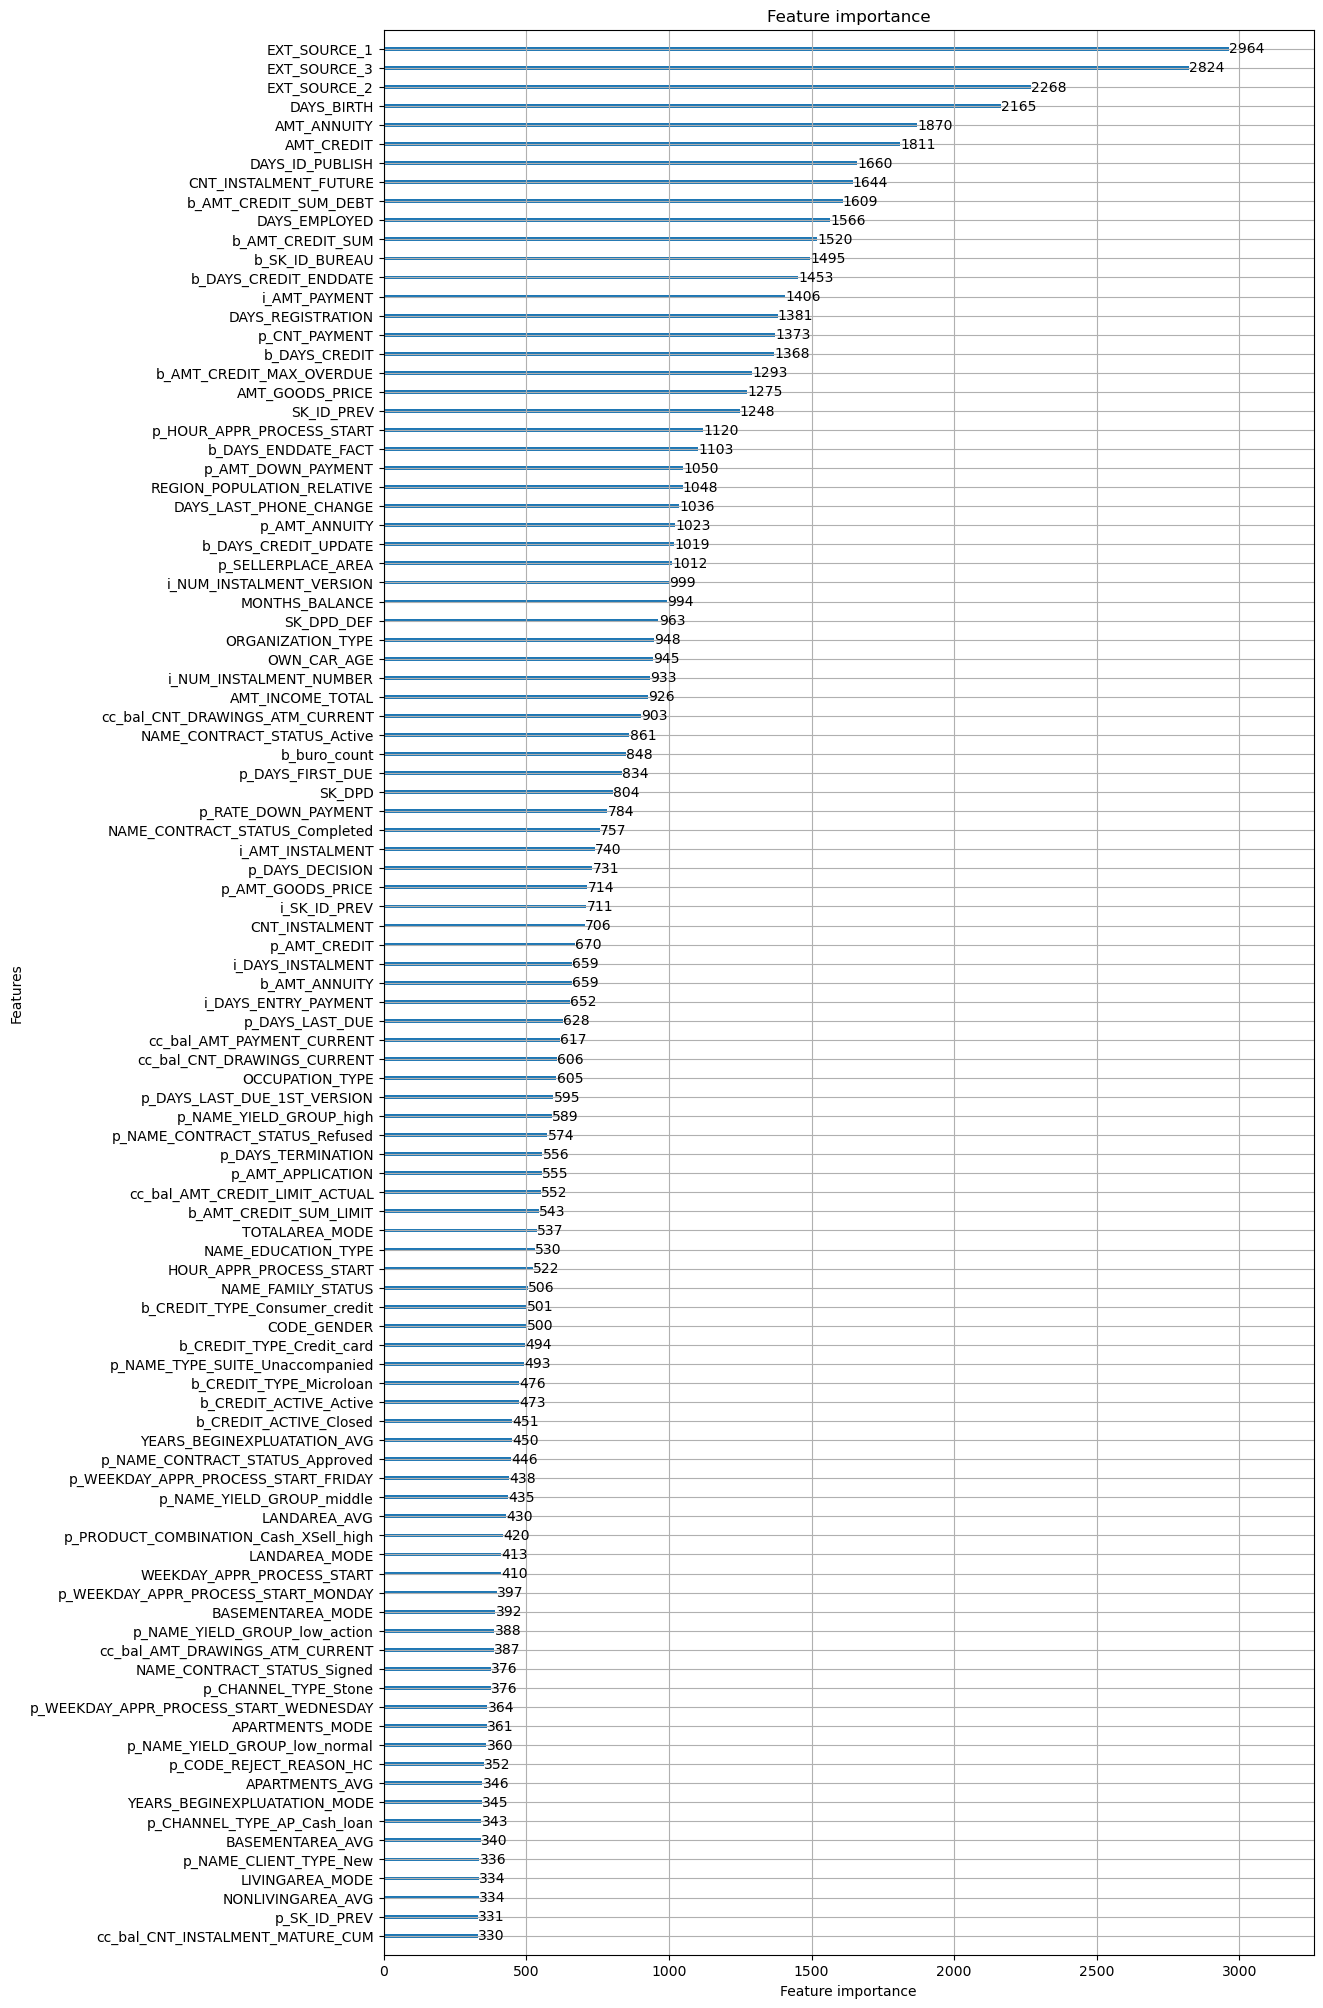

In [48]:
lgb.plot_importance(model, figsize=(12, 25), max_num_features=100);

### 9.7 Alternative Models

Performs cross-validation using the Stratified K-Fold technique and evaluates the performance of a given model using the ROC AUC scoring metric.

In [50]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

kfold = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)

def cross_validation(x, y, model):
    result= cross_val_score(model, x_train, y, cv=kfold, scoring="roc_auc", n_jobs=-1)
    print("Score: %f" % result.mean())

### XGBoost Model

Training a XGBoost model and return accuracy score

In [51]:
xgbc = XGBClassifier(learning_rate=0.2, 
                     max_depth=2, 
                     n_jobs=-1, 
                     random_state=100,
                     scale_pos_weight=11.387150050352467)

scores_xgbc = cross_validation(x_train, y_train, xgbc)
print(scores_xgbc)

Score: 0.768527
None


### CatBoost Model

Training a XGBoost model and return accuracy score

In [52]:
catboost = CatBoostClassifier(learning_rate=0.2,
                              max_depth=2,
                              random_state=100,
                              verbose=False)

scores_catboost = cross_validation(x_train, y_train, catboost)
print(scores_catboost)

Score: 0.778458
None


## Conclusion:

Performance comparison of 3 models appears to be quite similar with:

- LightGBM: 0.781738
- XGBoost: 0.768527
- CatBoost: 0.778458

Overall, LightGBM performed the best among the three models on the given dataset, followed by CatBoost, while XGBoost had the lowest performance. However, it's important to note that despite using the same dataset for 3 models, the specific performance of each model can vary depending on the parameters that we config and assign to each one, and the randomness of using data in their training process. 

Despite the models may have different accuracy values, they are still relatively close to each other. This indicates that all three models are providing reasonably reliable predictions on the given dataset.